In [1]:
# call libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# import data
density_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A/density.csv")
grid_attr_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A/grid_attr.csv")
infection_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A/infection.csv")
migration_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A/migration.csv")
transfer_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A/transfer.csv")
weather_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A/weather.csv")

# add colnames
density_A.columns = ["date","hour","longitude","latitude","population_flow_index"]
grid_attr_A.columns = ["grid_x","grid_y","region_id"]
infection_A.columns = ["city_id","region_id","date","number_of_newly_infected_persons"]
migration_A.columns = ["migration_date","migration_departure_city","migration_arrival_city","migration_scale_index"]
transfer_A.columns = ["hour","longitude_of_departure","latitude_departure","longitude_arrival","latitude_arrival","transfer_intensity"]
weather_A.columns = ["date","hour","temperature","humidity","wind_direction","wind_speed","wind_force","weather"]

# print the head of data
print(density_A.head())
print(grid_attr_A.head())
print(infection_A.head())
print(migration_A.head())
print(transfer_A.head())
print(weather_A.head())

       date  hour   longitude   latitude  population_flow_index
0  21200506     0  145.408434  29.482458                    0.2
1  21200506     0  145.419205  29.474652                    0.5
2  21200506     0  145.420993  29.469928                    0.1
3  21200506     0  145.421002  29.474652                    0.3
4  21200506     0  145.429994  29.471445                    0.1
       grid_x     grid_y  region_id
0  146.757689  30.249627          0
1  146.757698  30.238715          0
2  146.757698  30.240275          0
3  146.757698  30.241835          0
4  146.757698  30.243395          0
  city_id  region_id      date  number_of_newly_infected_persons
0       A          0  21200502                                 0
1       A          0  21200503                                 0
2       A          0  21200504                                 0
3       A          0  21200505                                 0
4       A          0  21200506                                 0
   migrati

In [3]:
# checking dimensions of data
print(density_A.shape)
print(grid_attr_A.shape)
print(infection_A.shape)
print(migration_A.shape)
print(transfer_A.shape)
print(weather_A.shape)

(35906204, 5)
(11799, 3)
(5309, 4)
(359, 4)
(5670547, 6)
(1079, 8)


In [4]:
# check the number of unique values for number of infected persons
len(infection_A.number_of_newly_infected_persons.unique())

935

In [5]:
# check the data types within each column
infection_A.dtypes

city_id                             object
region_id                            int64
date                                 int64
number_of_newly_infected_persons     int64
dtype: object

In [6]:
# convert the date column from integer to string
infection_A.date = infection_A.date.apply(str)
infection_A["newDate"] = infection_A.date.str[2:]
#print(infection_A["newDate"].head())

# datetime resources (https://www.w3schools.com/python/python_datetime.asp)
# convert the datetime to a list
dateList = infection_A["newDate"].tolist()

# create a new empty list to hold true datetime values
newDateList = []

# run datetime function
for d in dateList:
    dates = datetime.strptime(d, '%y%m%d')
    newDateList.append(dates)

# add the list as a new column to the dataframe
infection_A["dateTimeTrue"] = newDateList
infection_A.head()

,city_id,region_id,date,number_of_newly_infected_persons,newDate,dateTimeTrue
0,A,0,21200502,0,200502,2020-05-02
1,A,0,21200503,0,200503,2020-05-03
2,A,0,21200504,0,200504,2020-05-04
3,A,0,21200505,0,200505,2020-05-05
4,A,0,21200506,0,200506,2020-05-06


  city_id  region_id      date  number_of_newly_infected_persons dateTimeTrue
0       A          0  21200502                                 0   2020-05-02
1       A          0  21200503                                 0   2020-05-03
2       A          0  21200504                                 0   2020-05-04
3       A          0  21200505                                 0   2020-05-05
4       A          0  21200506                                 0   2020-05-06


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


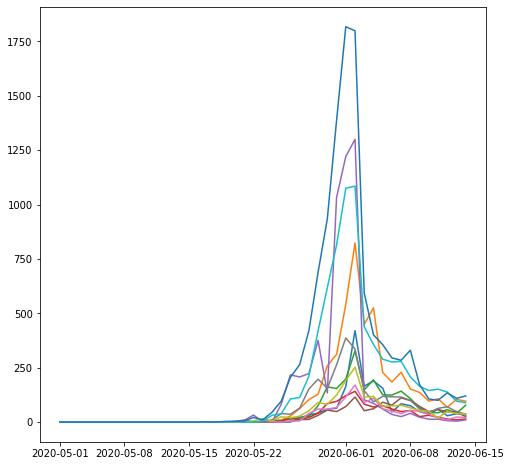

In [7]:
# create a filtered dataframe to visualize the data
subinf_A = infection_A[(infection_A.region_id <= 10)]
subinf_A = subinf_A.loc[:, ["city_id","region_id","date","number_of_newly_infected_persons","dateTimeTrue"]]
print(subinf_A.head())

# # alternate way of plotting - <<<<Did not work as expected, produced subplots>>>>
# fig, ax = plt.subplots(figsize=(8,6))
# subinf_A.groupby("region_id").plot(x='dateTimeTrue',y='number_of_newly_infected_persons')
# plt.show()

# plot the filtered dataset
# (https://stackoverflow.com/questions/42988302/pandas-groupby-results-on-the-same-plot)
for k,g in subinf_A.groupby("region_id"):
    plt.plot(g['dateTimeTrue'],g['number_of_newly_infected_persons'])
    # plt.legend(subinf_A.region_id) # need to fix legend
    # (https://stackoverflow.com/questions/18581534/labels-on-matplotlib-within-a-loop)
    
plt.gcf().set_size_inches(8, 8)
plt.show()

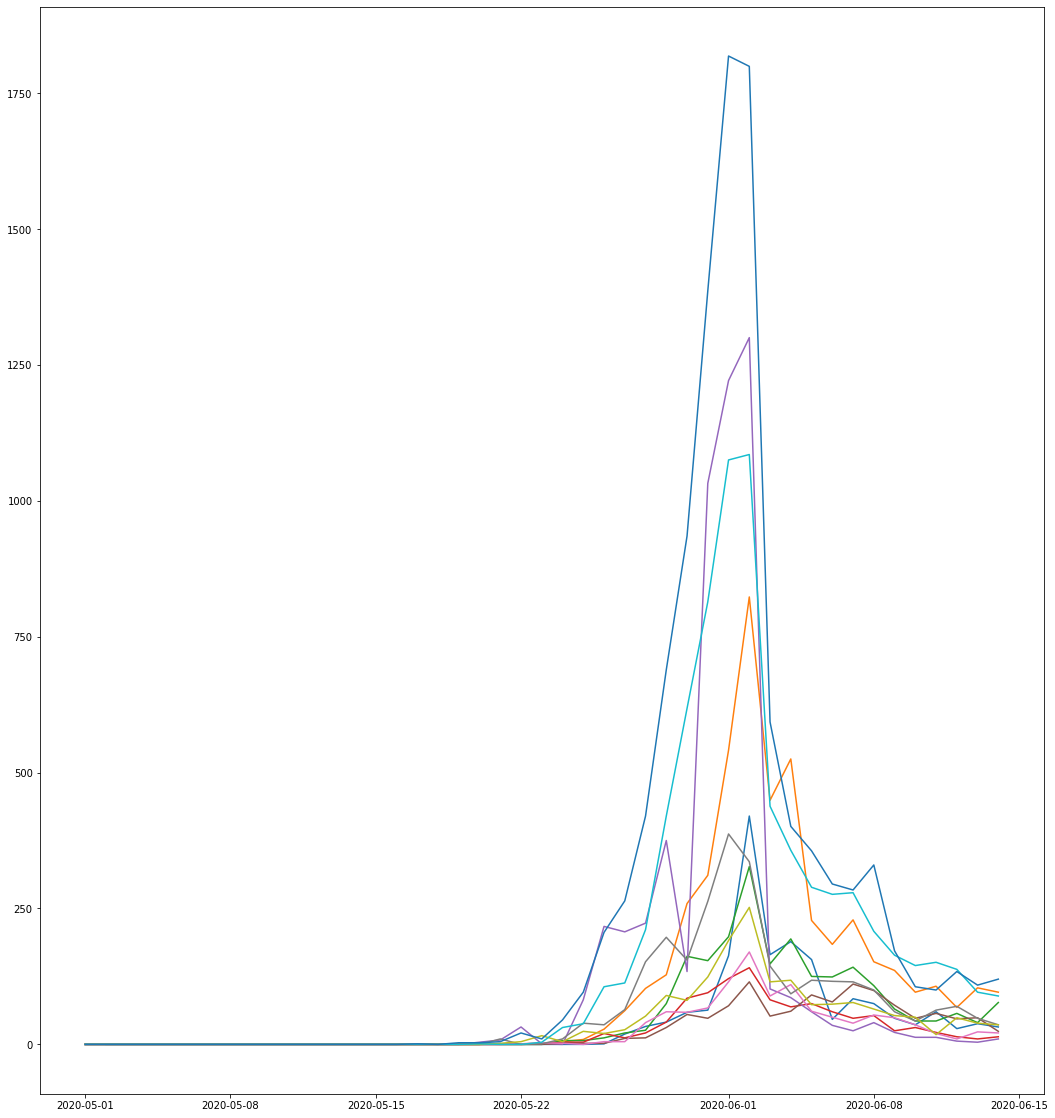

In [8]:
# try plotting for the entire data to see the distribution of cases in all cities
for k,g in subinf_A.groupby("region_id"):
  plt.plot(g['dateTimeTrue'],g['number_of_newly_infected_persons'])

plt.gcf().set_size_inches(18, 20)
plt.show()